**(c)** 2023 by *Sebastian Bader*
[Mobile Multimedia Information Systems](https://www.mmis.informatik.uni-rostock.de/),
[Institute for Visual and Analytic Computing](https://vac.uni-rostock.de/)

# 01 Tutorial - Getting startet - checking the versions

A Jupyter Notebook as part of the lecture<br/>
***AI3 - Introduction to artificial neural networks***

---

Recommended usage:

Please go through each of the greyish cells in this notebook (the one prefixed with `In [ ]`) step by step. Execute it by selecting the cell and pressing the `▶︎ Run`-button above, or pressing `SHIFT+ENTER`.

Within the notebook you will find some small tasks, marked as <font color=red>**[TASK]**</font>.
Please complete them (usually in the cell directly below) before continuing the tutorial!

Within the notebook you will also find some small tasks, marked as <font color=red>**[TASK@StudIP]**</font>.
Please complete them (usually in the cell directly below) and submit your answer via StudIP Tasks before continuing the tutorial!

<font color=red>**[TASK]:**</font> Write down the current time - you will need it later!

The following cell loads all necessary libraries for the following tutorial

In [106]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
print("Keras:      ", keras.__version__)
print("tensorflow: ", tf.__version__)
print("Numpy:      ", np.__version__)
print("Pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)

Keras:       2.15.0
tensorflow:  2.15.0
Numpy:       1.25.2
Pandas:      1.5.3
matplotlib:  3.7.1


# Building a very simple hand-written digit classifier ...

First let's load a test dataset:

In [4]:
# example of loading the mnist dataset
from keras.datasets import mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


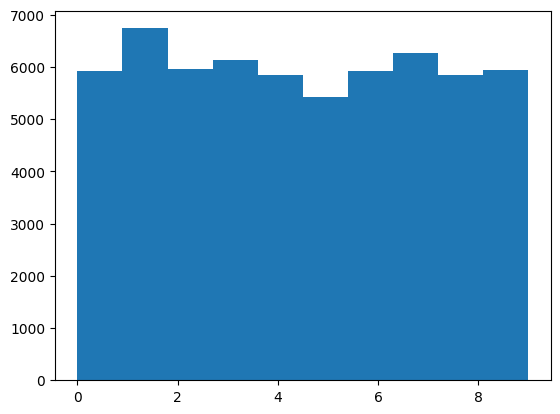

In [5]:
plt.hist(trainy, bins=10)
plt.show()

In [10]:
trainX[1]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

First, let's see how much data we got:

In [7]:
print('Training set: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test set:     X=%s, y=%s' % (testX.shape, testy.shape))

Training set: X=(60000, 28, 28), y=(60000,)
Test set:     X=(10000, 28, 28), y=(10000,)


And then we will look inside by plotting some of the digits contained within the dataset:

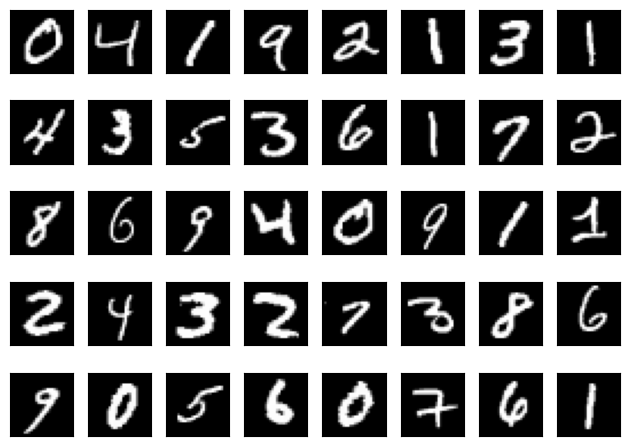

In [11]:
i,rs,cs=0,5,8
for r in range(rs):
    for c in range(cs):
        i = i+1
        plt.subplot(rs,cs,i)
        plt.imshow(trainX[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])

plt.tight_layout()
plt.show()

Next, we create a simple feed-forward network (don't worry about the details yet)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

And prepare it for the training, by compiling it into a tensorflow graph.

In [104]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

The model can now be trained using the training samples...

In [14]:
model.fit(trainX, trainy, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 9.8462 - accuracy: 0.8411
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0614 - accuracy: 0.8801
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.6452 - accuracy: 0.8834
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4804 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3344 - accuracy: 0.8879
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.1511 - accuracy: 0.8889
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3702 - accuracy: 0.8873
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2488 - accuracy: 0.8893
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.0867 - accuracy: 0.8894
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 5.086

Now lets, use the model to predict the numbers from the test-set.
The result will be a dataframe, containing the probabilities for all classes (digits from 0 to 9) for all the 1000 test samples.

In [15]:
predy = model.predict(testX)
predDF = pd.DataFrame(predy, columns=[i for i in range(10)])
predDF

313/313 [==============================] - 0s 869us/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.291650e-20
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00


We will select the maximum probability for each column and store this as prediction in the column `Pred`.

In [16]:
predDF['Pred'] = predDF.idxmax(axis=1)
predDF

,0,1,2,3,4,5,6,7,8,9,Pred
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,7
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.291650e-20,4
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,4
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,5


Now we will add the ground truth (contained in `testy`) as a new column.

In [17]:
predDF['GT'] = testy
predDF

,0,1,2,3,4,5,6,7,8,9,Pred,GT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000e+00,7,7
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2,2
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.291650e-20,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2,2
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,3,3
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000e+00,4,4
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000e+00,5,5


In [108]:
accuracy_score(predDF["GT"], predDF["Pred"])

0.8852

Now lets look at those rows, in which prediction and ground truth disagree.

In [18]:
dDF = predDF[predDF['GT'] != predDF['Pred']]
dDF

,0,1,2,3,4,5,6,7,8,9,Pred,GT
8,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999999e-01,0.0,0.000000e+00,0.000000e+00,6,5
18,0.0,0.0,0.000000e+00,1.181628e-07,0.000000e+00,2.353639e-11,3.308201e-35,0.0,9.999998e-01,0.000000e+00,8,3
22,0.0,0.0,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,1.801240e-20,0.0,0.000000e+00,0.000000e+00,4,6
32,0.0,0.0,0.000000e+00,3.216708e-21,0.000000e+00,9.999999e-01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5,3
66,0.0,0.0,0.000000e+00,9.999999e-01,3.931039e-23,0.000000e+00,2.309092e-12,0.0,1.475562e-35,0.000000e+00,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9975,0.0,0.0,0.000000e+00,5.238405e-15,0.000000e+00,1.023798e-34,0.000000e+00,0.0,9.999999e-01,0.000000e+00,8,3
9980,0.0,0.0,4.998639e-29,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,3,2
9982,0.0,0.0,5.254926e-27,2.410461e-22,0.000000e+00,0.000000e+00,9.999999e-01,0.0,4.999381e-37,0.000000e+00,6,5
9985,0.0,0.0,1.726808e-01,3.402466e-02,0.000000e+00,1.139302e-30,0.000000e+00,0.0,7.932945e-01,6.716838e-35,8,2


And finally let's plot some of the good and the bad examples.

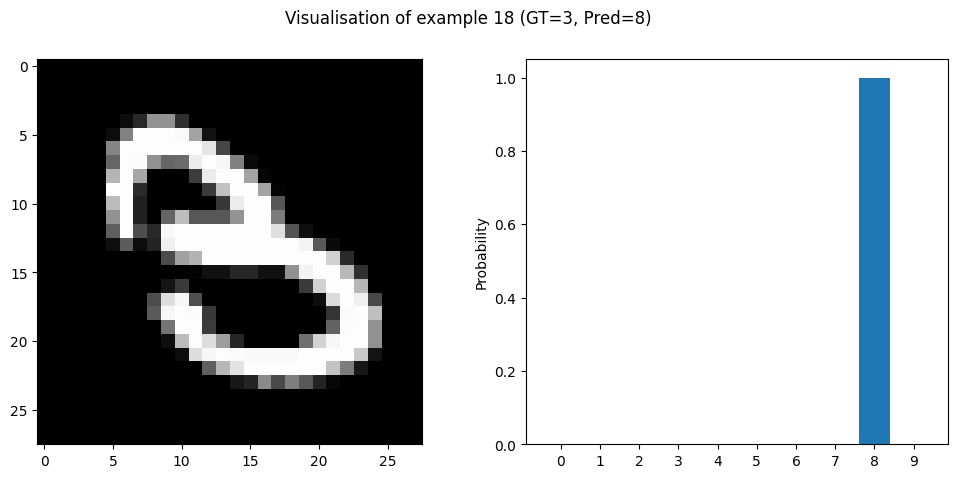

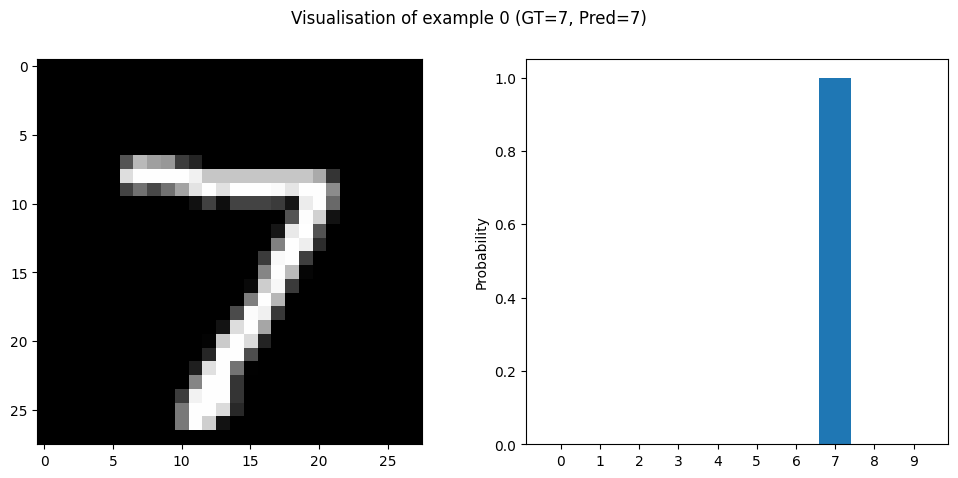

In [19]:
def show_sample(e):
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.imshow(testX[e], cmap='gray')

    plt.subplot(122)
    plt.bar(range(10),predDF.iloc[e][0:10])
    plt.xticks(range(10))
    plt.ylabel('Probability')

    plt.suptitle('Visualisation of example %i (GT=%i, Pred=%i)' % (e, predDF.iloc[e]['GT'], predDF.iloc[e]['Pred']))
    plt.show()


# the first bad example:
show_sample(dDF.index[1])

# the first example from the test-set
show_sample(0)




---

# Tasks from the exercise sheet 01T_Getting_Started.pdf

<font color=red>**[TASK]:**</font> Create a nice looking histogram over misclassified samples as shown on the exercise sheet!

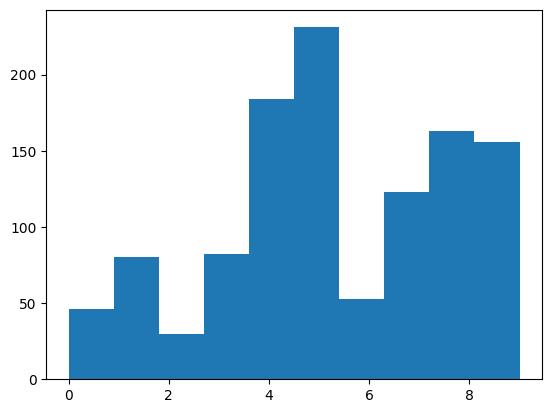

In [22]:
plt.hist(dDF[["Pred"]], bins=10)
plt.show()

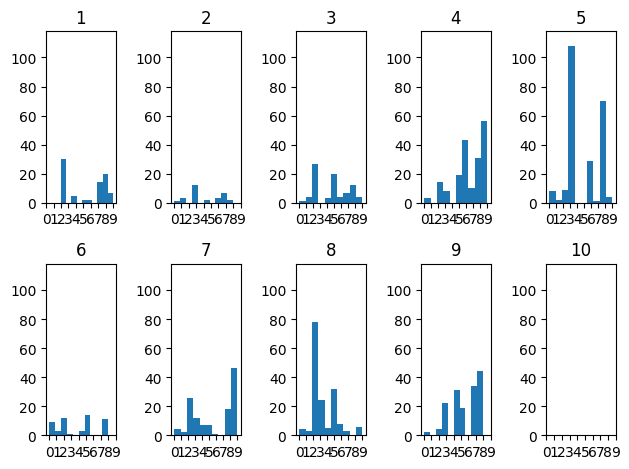

In [105]:
missClassifierCombinationsMax = dDF[["GT","Pred"]].value_counts().max()

i,rs,cs=0,2,5
for r in range(rs):
    for c in range(cs):
        i = i+1
        plt.subplot(2,5,i)

        plt.hist(dDF[["GT"]][(dDF["Pred"] == i)])
        plt.title(i)
        plt.ylim(0,missClassifierCombinationsMax + 10)
        plt.xticks(np.arange(0, 10, step=1))

plt.tight_layout()
plt.show()


<font color=red>**[TASK]:**</font> Generate a confusion matrix over the misclassified digits as shown on the exercise sheet!

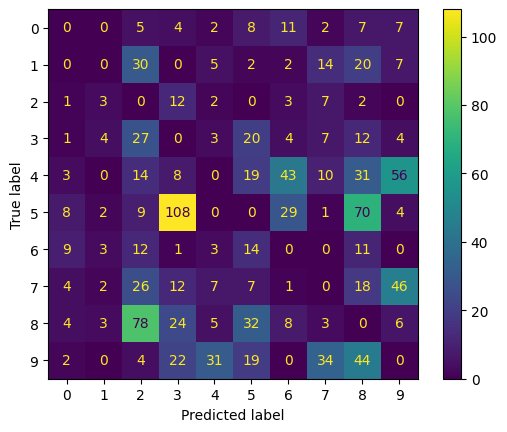

In [103]:
cm = confusion_matrix(dDF["Pred"].to_numpy(), dDF["GT"].to_numpy(), labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot()
plt.show()

<font color=red>**[TASK]:**</font> How long did it take you to complete the tutorial?

<font color=red>**[TASK]:**</font> What was the hardest part of this tutorial?

<font color=red>**[TASK]:**</font> What do you expect to learn in the lecture AI3?